# BÁO CÁO BÀI TẬP THỰC HÀNH VÀ ĐỒ ÁN CUỐI KỲ

- Dành cho lớp CS114.O21 và CS114.O21.KHCL

## THÔNG TIN NHÓM

- Mỗi SV của nhóm điền các thông tin như bên dưới

1. MSSV-21521857
  - Họ và Tên: Nguyễn Tô Thiên Bảo
  - Số buổi vắng: 5
  - Số bài tập quá trình: làm hết
  - Điểm WeCode:
    + Bài TH1: 750/1000
    + Bài TH2: 900/1000
    + Bài TH3 (Search): 400/500
    + Bài TH4 (Sort&List) 100/400
    + Dự đoán IT001: Tổng 80 điểm
    + Chữ cái viết tay: 410/1000



## THÔNG TIN ĐỒ ÁN - THỰC HÀNH

Các SV cần mô tả đầy đủ, càng chi tiết càng tốt về các bài thực hành đã làm để có cơ sở tính điểm đồ án và thực hành.

1. Trang github của nhóm: https://github.com/jbz26/CS114.O21.KHCL

2. Đồ án cuối kỳ: MotocycleClassification
- Tổng số lượng ảnh đóng góp: 174
- Phương pháp rút trích đặc trưng sử dụng: MobileNetV2
- Thuật toán học được sử dụng:
  - LogisticRegression
  - RandomForest
  - XGBoost
  - CNN
- Framework, thư viện sử dụng:
  tensorflow (phần rút trích đặc trưng hình ảnh, CNN model); sklearn để sử dụng một số mô hình máy học (Logistic, RandomForest, XGBoost)

3. Danh sách các bài thực hành đã làm - điền thời điểm (ngày, giờ) nộp bài trên Classroom:
- Thống kê dữ liệu (CS114.Tool.DatasetStat.ipynb): Jun 14
- Tạo các splits (CS114.Tool.CreateSplit.ipynb): Jun 15
- Hiển thị các ảnh (CS114.Tool.DatasetViz.ipynb):Jun 15
- Ứng dụng Clustering (CS114.Clustering.ipynb):Jun 20
- Đánh giá Model (CS114.Evaluation.ipynb): 8:16 PM Jun 24

4. Bài tập - Dự đoán điểm IT001
- Với mỗi MSSV có nhiều điểm dữ liệu điểm cho từng problems trong mỗi assignment;
- Bước xử lý dữ liệu:
  - Em gom nhóm theo MSSV, sau đó từng cột dữ liệu mới sẽ bằng trung bình cộng của theo từng MSSV;
  - Em tạo một cột dữ liệu đếm số problems đã được hoàn thành;
  - Sau đó qua 1 số bước tiền xử lý như loại bỏ null, LabelEncoder, Scale
- Thuật toán học, em sử dụng XGBoost model kết hợp GridSearchCV để chọn được bộ trọng số tối ưu nhất (Em đã có thử sử dụng linearRegression, DSTree, RandomForest nhưng kết quả không được tốt bằng)

5. Bài tập - Nhận dạng chữ số viết tay
- Em có đóng góp bộ data gồm 6 hình/1 chữ số.
  - Trong đó có 3 tấm là do em tự chụp và viết, 3 tấm còn lại là do một người bạn chung phòng viết và chụp với góc độ khác.
  - Vì có thể chưa đặt tên đúng, hay một lý do nào đó dữ liệu của em chưa được cập nhật trên sheet của thầy (em đã có update lên github và đặt tên đúng yêu cầu rồi ạ)
- Vì mô hình được build trước đó sử dụng ảnh đầu vào là màu đen trắng, nên em có một số bước để xử lý ảnh chuyển về màu đen trắng, sau đó sử dụng mô hình đã được train trước đó để dự đoán.

## MÔ TẢ HỖ TRỢ CỦA CÁC CÔNG CỤ NHƯ CHATGPT, GEMINI, POE

- Vì không nhớ được cú pháp của một số câu lệnh trong python, cũng như một số hyperparameters của các model nên em có sử dụng CHATGPT để gợi ý phần cú pháp, cũng như ý nghĩa của một số Hyperparameters
- Bên cạnh đó, tại bước rút trích đặc trưng, em có nhờ ChatGPT để hỗ trợ phần phân luồng xử lý, giúp tăng tốc độ xử lý nhanh hơn (khoảng 5-8 lần so với chạy thông thường)

## CODE CỦA ĐỒ ÁN MOTOCYCLECLASSIFICATION

1. Tham khảo các bước
  - https://keras.io/examples/vision/image_classification_from_scratch/

2. Các lưu ý:
  - Cần ghi rõ thông tin ngày cập nhật
  - Đoạn code của người khác nếu sử dụng lại, phải ghi tham chiếu để phân biệt đâu là code của mình, đâu là code của người khác
  - Cần phải có chú thích càng chi tiết càng tốt để code dễ đọc, dễ kiểm tra
  - Notebook nộp bài phải là notebook đã chạy và giữ lại output
  - Các hành vi gian lận sẽ bị trừng phạt rất nghiêm khắc

## CODE CHẠY CHO MỘT SPLIT

- Các cells bên dưới sẽ phục vụ cho một split
- Trước mỗi Code cell, nên có Text cell để giải thích

In [ ]:
# import các thư viện

import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
import pandas as pd
import random
from PIL import Image
import requests
from io import BytesIO



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Các biến toàn cục

# thư mục gốc chứa thư mục dữ liệu
szWorkingDir = "/content/gdrive/MyDrive/Public"

# dùng để hiển thị
nNumImgsPerRow = 10
nImgHeight = nImgWidth = 150

### Bước 1 - Dataset Visualization

- Mục đích để kiểm tra xem dữ liệu có sạch, chuẩn hoá chưa

- Kết quả dự kiến <IMG SRC = 'https://editor.analyticsvidhya.com/uploads/762161_OSvbuPLy0PSM2nZ62SbtlQ.png'>

In [ ]:
#Load toàn bộ data
curSplit = 1

szTrainFileName = "MotocycleDataset-Splits-{}-Train.csv".format(curSplit)
szTestFileName = "MotocycleDataset-Splits-{}-Test.csv".format(curSplit)
df_train = pd.read_csv(os.path.join(szWorkingDir,szTrainFileName), header=None, names=['ImageFullPath', 'CategoryID'])
df_test = pd.read_csv(os.path.join(szWorkingDir,szTestFileName), header=None, names=['ImageFullPath', 'CategoryID'])
df = pd.concat([df_train, df_test])
df.shape

(35053, 2)

Hàm để lấy hình ảnh và vẽ hình ảnh qua đường dẫn của file

In [ ]:

def getImageFromName(path, file_path):
    try:
        img = Image.open(os.path.join(path, file_path))
        return img
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
#vẽ hình ảnh ra dưới dạng lưới, với mỗi loại xe là một hàng
def display_images_in_grid(root_folder_id, category, all_images_data, num_imgs_per_row=10, img_height=150, img_width=150):
    fig, axes = plt.subplots(len(category), num_imgs_per_row + 1, figsize=(img_width * (num_imgs_per_row + 1) / 100, img_height * len(category) / 100))

    # Loop through each row and display the images
    for row in range(len(category)):
        for col in range(1, num_imgs_per_row + 1):
            ax = axes[row, col]
            if col - 1 < len(all_images_data[row]):
                img = all_images_data[row][col - 1]
                img = img.resize((img_width, img_height))
                ax.imshow(img)
            ax.axis('off')

        # Add label to the first column of each row
        label_ax = axes[row, 0]
        label_ax.text(0.5, 0.5, category[row], rotation=0, fontsize=20, verticalalignment='center', horizontalalignment='center')
        label_ax.axis('off')
        pos1 = label_ax.get_position() # get the original position
        label_ax.set_position([pos1.x0, pos1.y0, pos1.width, pos1.height])

    plt.suptitle(f'Number of images per rows: {num_imgs_per_row}', fontsize=16)
    plt.tight_layout()
    plt.show()


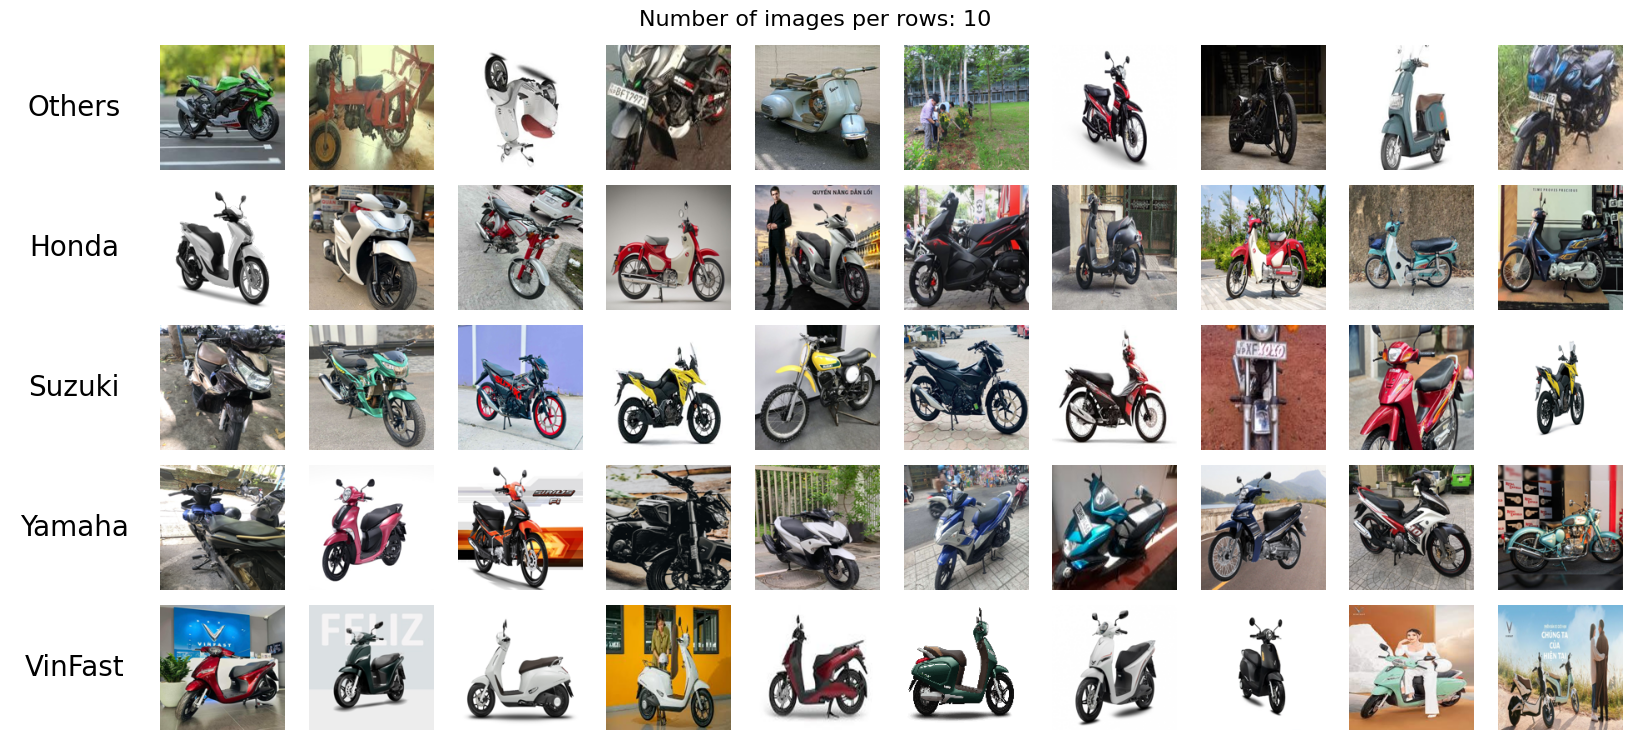

In [ ]:
image_labels = ['Others', 'Honda', 'Suzuki', 'Yamaha', 'VinFast']
all_images_data = []
grouped = df.groupby('CategoryID')
for category, group in grouped:
    images_data = []
    while True:
        image_paths = group['ImageFullPath'].tolist()
        random.shuffle(image_paths)
        selected_image_paths = image_paths[:nNumImgsPerRow]
        temp = False
        for image_path in selected_image_paths:
            img = getImageFromName(szWorkingDir, image_path)
            if img is not None:
                images_data.append(img)
            else:
                temp = True
                break
        if not temp:
            break
    all_images_data.append(images_data)

# Display images in grid
display_images_in_grid(szWorkingDir, image_labels, all_images_data, nNumImgsPerRow, nImgHeight, nImgWidth)

### Bước 2 - Data Augmentation

- Làm giàu dữ liệu bằng các công cụ có sẵn từ các framework như Keras



### Bước 3 - Feature Extraction

In [ ]:
import tensorflow as tf

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image

base_model = MobileNetV2(weights='imagenet', include_top=False)

# Thêm lớp Global Average Pooling
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Định nghĩa mô hình trích xuất đặc trưng
feature_extractor = tf.keras.models.Model(inputs=base_model.input, outputs=x)

9406464/9406464 [==============================] - 0s 0us/step



*   Hàm load hình ảnh, chuyển thành mảng và trích xuất các đặc trưng từ ảnh bằng mô hình MobileNetV2, chia thành từng batch với kích thước là 1000 ảnh.
*  Sau đó lưu các đặc trưng đã trích xuất được cùng với label và image path vào các file theo từng batch trong folder /content/batchs




In [ ]:
import numpy as np
import pickle
import gc
from PIL import Image, UnidentifiedImageError
import os
import pandas as pd
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from concurrent.futures import ThreadPoolExecutor, as_completed

countError = 0
os.makedirs('/content/batchs', exist_ok=True)
#load hình ảnh và chuyển về dạng mảng
def load_image(path, file_path):
    try:
        img_path = os.path.join(path, file_path)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        return img_array
    except (UnidentifiedImageError, OSError) as e:
        print(f"Error processing {file_path}: {e}")
        return None
#Hàm xử lí hình ảnh, dựa trên mô hình mobileNetv2 đã định nghĩa ở trên
def preprocess_and_extract_features(img_array_batch):
    img_array_batch = np.array(img_array_batch)
    img_array_batch = preprocess_input(img_array_batch)
    features_batch = feature_extractor.predict(img_array_batch)
    features_2d_batch = features_batch.reshape(features_batch.shape[0], -1)
    return features_2d_batch

#Hàm xử lí toàn bộ data với 50 thread, sau đó dữ liệu sẽ được lưu trong các file tại thư mục /content/batchs/
def process_images_in_batches(root_folder_path, image_paths,labels, batch_size=1000, num_threads=50):
    global countError
    batch_count = 0
    img_array_batch = []
    paths_batch = []
    labels_batch = []
    temp_image_paths=image_paths
    def process_image(image_path):
        img_array = load_image(root_folder_path, image_path)
        return img_array, image_path

    while temp_image_paths:
        with ThreadPoolExecutor(max_workers=num_threads) as executor:
            future_to_image = {executor.submit(process_image, image_path): image_path for image_path in temp_image_paths[:batch_size]}
            temp_image_paths = temp_image_paths[batch_size:]
            for i, future in enumerate(as_completed(future_to_image)):
                try:
                    img_array, path = future.result()
                    if img_array is not None:
                        img_array_batch.append(img_array)
                        paths_batch.append(path)
                        labels_batch.append(labels[image_paths.index(path)])

                    if len(img_array_batch) == batch_size:
                        features_batch = preprocess_and_extract_features(img_array_batch)
                        features_with_path = [(features, file_path,label) for features, file_path,label in zip(features_batch, paths_batch,labels_batch)]
                        with open(f'/content/batchs/features_batch_{batch_count}.pkl', 'wb') as f:
                            pickle.dump(features_with_path, f)
                        img_array_batch = []
                        paths_batch = []
                        labels_batch= []
                        gc.collect()
                        batch_count += 1


                except Exception as e:
                    print(f"Failed to process image: {e}")
                    countError += 1

            # Clear the future_to_image to free up memory
            del future_to_image
            gc.collect()

    if img_array_batch:
        features_batch = preprocess_and_extract_features(img_array_batch)
        features_with_path = [(features, file_path,label) for features, file_path,label in zip(features_batch, paths_batch,labels_batch)]
        with open(f'/content/batchs/features_batch_{batch_count}.pkl', 'wb') as f:
              pickle.dump(features_with_path, f)
        img_array_batch = []
        paths_batch = []
        labels_batch= []
        gc.collect()
    # Clear any remaining data
    del img_array_batch, paths_batch
    gc.collect()

#Lấy các image paths và label
all_image_paths = df['ImageFullPath'].tolist()
all_labels = df['CategoryID'].tolist()
#Gọi hàm xử lí
process_images_in_batches(szWorkingDir, all_image_paths, all_labels, batch_size=1000, num_threads=50)

Error processing Honda/22520968-22520996-22520999-22520929-22521373.Honda.1022.jpg: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Public/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1022.jpg'
Error processing Honda/22520968-22520996-22520999-22520929-22521373.Honda.1023.jpg: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Public/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1023.jpg'
Error processing Honda/22520968-22520996-22520999-22520929-22521373.Honda.1024.jpg: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Public/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1024.jpg'
Error processing Honda/22520968-22520996-22520999-22520929-22521373.Honda.1030.jpg: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Public/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1030.jpg'
Error processing Honda/22520968-22520996-22520999-22520929-22521373.Honda.1045.jpg: [Errno 2] No such file or directory:

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error processing Honda/22520968-22520996-22520999-22520929-22521373.Honda.1380.jpg: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Public/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1380.jpg'
Error processing Honda/22520968-22520996-22520999-22520929-22521373.Honda.1386.jpg: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Public/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1386.jpg'
Error processing Honda/22520968-22520996-22520999-22520929-22521373.Honda.1398.jpg: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Public/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1398.jpg'
Error processing Honda/22520968-22520996-22520999-22520929-22521373.Honda.1399.jpg: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Public/Honda/22520968-22520996-22520999-22520929-22521373.Honda.1399.jpg'
Error processing Honda/22520968-22520996-22520999-22520929-22521373.Honda.1423.jpg: [Errno 2] No such file or directory:

Hàm để đọc lại các thông tin trích xuất được image path, label đã lưu trước đó từ file, lưu vào các biến để có thể xử lý cho bước sau

In [ ]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import pickle
import os
# Load all batches with all image features, paths and labels
def process_train_batches():
    all_features = []
    all_image_paths = []
    all_labels= []
    for filename in os.listdir('/content/batchs'):
        with open(os.path.join('/content/batchs',filename), 'rb') as f:
            features_with_path = pickle.load(f)
        batch_data = np.array([item[0].flatten() for item in features_with_path])
        image_paths = [item[1] for item in features_with_path]
        labels = [item[2] for item in features_with_path]
        all_features.append(batch_data)
        all_image_paths.extend(image_paths)
        all_labels.extend(labels)
    all_features = np.vstack(all_features)
    return  all_image_paths, all_features,all_labels

# Example usage:
all_image_paths, all_features,all_labels = process_train_batches()


# **Đặt lại split ở đây để có thể lấy file train, test theo từng split**

In [ ]:
curSplit = 2
szTrainFileName = "MotocycleDataset-Splits-{}-Train.csv".format(curSplit)
szTestFileName = "MotocycleDataset-Splits-{}-Test.csv".format(curSplit)
df_train = pd.read_csv(os.path.join(szWorkingDir,szTrainFileName), header=None, names=['ImageFullPath', 'CategoryID'])
df_test = pd.read_csv(os.path.join(szWorkingDir,szTestFileName), header=None, names=['ImageFullPath', 'CategoryID'])

Tách thành dữ liệu train, test dựa trên image path trong các file train, test trên

In [ ]:
# Dữ liệu train
train_features = []
train_labels = []
for index, row in df_train.iterrows():
    if row['ImageFullPath'] in all_image_paths:
        idx = all_image_paths.index(row['ImageFullPath'])
        train_features.append(all_features[idx])
        train_labels.append(all_labels[idx])

# Dữ liệu test
test_features = []
test_labels = []
for index, row in df_test.iterrows():
    if row['ImageFullPath'] in all_image_paths:
        idx = all_image_paths.index(row['ImageFullPath'])
        test_features.append(all_features[idx])
        test_labels.append(all_labels[idx])


### Bước 4 - Model Configuration

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Trích xuất đặc trưng cho toàn bộ dữ liệu

train_features = np.array(train_features)
test_features = np.array(test_features)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Giảm chiều dữ liệu bằng PCA
#pca = PCA(n_components=0.95)
#features_pca = pca.fit_transform(train_features_scaled)
#test_features_pca = pca.transform(test_features_scaled)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_features, val_features, train_labels, val_labels = train_test_split(train_features_scaled, train_labels, test_size=0.2, random_state=42)
test_features, test_labels = test_features_scaled, test_labels
eval_set = [(train_features, train_labels), (val_features, val_labels)]


In [ ]:
print(train_features.shape)
print(val_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(22221, 1280)
(5556, 1280)
(6935, 1280)
(22221,)
(5556,)
(6935,)


Tại đây em có sử dụng 4 model:


*   Logistic Regression
*   Random Forest
*   XGBoost
*   Mạng CNN đơn giản với 2 hidden layer, 1 output layer với hàm softmax để tính xác suất ảnh thuộc loại xe nào



In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=10000, multi_class='multinomial', solver='lbfgs')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
import xgboost as xgb
# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
eval_set = [(test_features, test_labels)]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 50],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(objective='multi:softmax', num_class=5, random_state=42)

# Perform grid search with cross-validation
random_search2 = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the number of output classes
num_classes = 5
# Define the neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_features.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Bước 5 - Model Training


In [ ]:
#Logistic model
logistic_model.fit(train_features, train_labels)
train_predictions = logistic_model.predict(train_features)
accuracy = accuracy_score(train_labels, train_predictions)
print(f"Logistic train accuracy: {accuracy}")

Logistic train accuracy: 0.6648665676612213


In [ ]:
#Random Forest classifier model
rf_model.fit(train_features, train_labels)
# Train accuracy
train_predictions_rf = rf_model.predict(train_features)
train_accuracy_rf = accuracy_score(train_labels, train_predictions_rf)
print(f"Random Forest Train accuracy: {train_accuracy_rf}")


Random Forest Train accuracy: 0.9963998019891094


In [ ]:
#Single XGBoost model
xgb_model.fit(train_features, train_labels, eval_metric=[ "auc"], eval_set=eval_set, early_stopping_rounds=10)
#Train accuracy
train_predictions_xgb = xgb_model.predict(train_features)
train_accuracy_xgb = accuracy_score(train_labels, train_predictions_xgb)
print(f"Single XGBoost Train accuracy: {train_accuracy_xgb}")


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.69295
[1]	validation_0-auc:0.72325
[2]	validation_0-auc:0.74204
[3]	validation_0-auc:0.75401
[4]	validation_0-auc:0.76200
[5]	validation_0-auc:0.76898
[6]	validation_0-auc:0.77671
[7]	validation_0-auc:0.78194
[8]	validation_0-auc:0.78686
[9]	validation_0-auc:0.79035
[10]	validation_0-auc:0.79396
[11]	validation_0-auc:0.79767
[12]	validation_0-auc:0.80119
[13]	validation_0-auc:0.80424
[14]	validation_0-auc:0.80695
[15]	validation_0-auc:0.80919
[16]	validation_0-auc:0.81144
[17]	validation_0-auc:0.81355
[18]	validation_0-auc:0.81540
[19]	validation_0-auc:0.81787
[20]	validation_0-auc:0.81986
[21]	validation_0-auc:0.82180
[22]	validation_0-auc:0.82364
[23]	validation_0-auc:0.82511
[24]	validation_0-auc:0.82665
[25]	validation_0-auc:0.82765
[26]	validation_0-auc:0.82912
[27]	validation_0-auc:0.82993
[28]	validation_0-auc:0.83170
[29]	validation_0-auc:0.83326
[30]	validation_0-auc:0.83419
[31]	validation_0-auc:0.83516
[32]	validation_0-auc:0.83629
[33]	validation_0-au

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings

[0]	validation_0-auc:0.73524	validation_1-auc:0.68755
[1]	validation_0-auc:0.76137	validation_1-auc:0.70635
[2]	validation_0-auc:0.77222	validation_1-auc:0.71499
[3]	validation_0-auc:0.77893	validation_1-auc:0.72101
[4]	validation_0-auc:0.78660	validation_1-auc:0.72735
[5]	validation_0-auc:0.79202	validation_1-auc:0.73186
[6]	validation_0-auc:0.79548	validation_1-auc:0.73479
[7]	validation_0-auc:0.79786	validation_1-auc:0.73539
[8]	validation_0-auc:0.80063	validation_1-auc:0.73813
[9]	validation_0-auc:0.80268	validation_1-auc:0.73982
[10]	validation_0-auc:0.80450	validation_1-auc:0.74074
[11]	validation_0-auc:0.80608	validation_1-auc:0.74224
[12]	validation_0-auc:0.80777	validation_1-auc:0.74340
[13]	validation_0-auc:0.80907	validation_1-auc:0.74478
[14]	validation_0-auc:0.80954	validation_1-auc:0.74549
[15]	validation_0-auc:0.80993	validation_1-auc:0.74562
[16]	validation_0-auc:0.81191	validation_1-auc:0.74666
[17]	validation_0-auc:0.81274	validation_1-auc:0.74720
[18]	validation_0-au

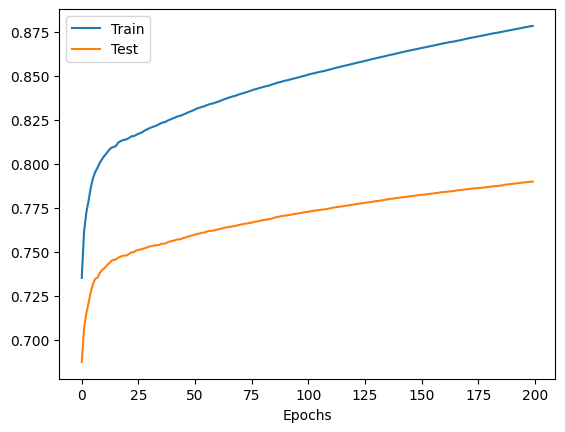

In [ ]:
#XGBoost model kết hợp RandomSearchCV
random_search2.fit(train_features, train_labels)

# Get the best parameters from grid search
best_params = random_search2.best_params_

# Train the XGBoost model with the best parameters
best_xgb_model = XGBClassifier(objective='multi:softmax', num_class=5, random_state=42, **best_params)
eval_set = [(train_features, train_labels), (test_features, test_labels)]
best_xgb_model.fit(train_features, train_labels, eval_metric=[ "auc"], eval_set=eval_set, early_stopping_rounds=10)
# Evaluate the model on the training set
train_predictions = best_xgb_model.predict(train_features)
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Train accuracy: {train_accuracy}")

#Vẽ accuracy score
evals_result = best_xgb_model.evals_result()

# Plot training and validation log loss
epochs = len(evals_result['validation_0']['auc'])
x_axis = range(0, epochs)

# Plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, evals_result['validation_0']['auc'], label='Train')
ax.plot(x_axis, evals_result['validation_1']['auc'], label='Test')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel
print(evals_result)



In [ ]:
#CNN model
model.fit(train_features, train_labels, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
556/556 [==============================] - 13s 20ms/step - loss: 1.2493 - accuracy: 0.4908 - val_loss: 1.0766 - val_accuracy: 0.5665
Epoch 2/50
556/556 [==============================] - 9s 16ms/step - loss: 0.9711 - accuracy: 0.6143 - val_loss: 0.9634 - val_accuracy: 0.6126
Epoch 3/50
556/556 [==============================] - 10s 17ms/step - loss: 0.8327 - accuracy: 0.6735 - val_loss: 0.9503 - val_accuracy: 0.6308
Epoch 4/50
556/556 [==============================] - 8s 14ms/step - loss: 0.7275 - accuracy: 0.7170 - val_loss: 0.9547 - val_accuracy: 0.6337
Epoch 5/50
556/556 [==============================] - 10s 19ms/step - loss: 0.6392 - accuracy: 0.7519 - val_loss: 0.9566 - val_accuracy: 0.6439
Epoch 6/50
556/556 [==============================] - 10s 17ms/step - loss: 0.5551 - accuracy: 0.7904 - val_loss: 0.9664 - val_accuracy: 0.6614
Epoch 7/50
556/556 [==============================] - 9s 16ms/step - loss: 0.4814 - accuracy: 0.8153 - val_loss: 1.0268 - val_accuracy: 0.

### Bước 6 - Model Evaluation

- Dùng model (kết quả của bước Model Training) để predict CategoryID của các ảnh trong tập dữ liệu Test, sau đó tính Accuracy và Confusion Matrix

In [ ]:
# Dự đoán trên tập kiểm tra
test_predictions = logistic_model.predict(test_features)

# Tính độ chính xác của Logistic model
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Logistic test accuracy: {accuracy}")

# Test accuracy của Logistic model
test_predictions_rf = rf_model.predict(test_features)
test_accuracy_rf = accuracy_score(test_labels, test_predictions_rf)
print(f"Random Forest Test accuracy: {test_accuracy_rf}")


# Test accuracy của Single XGBoost
test_predictions_xgb = xgb_model.predict(test_features)
test_accuracy_xgb = accuracy_score(test_labels, test_predictions_xgb)
print(f"Single XGBoost Test accuracy: {test_accuracy_xgb}")

# Test accuracy của XGBoost kết hợp RandomsearchCV
test_predictions = best_xgb_model.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Best XGB model test accuracy: {test_accuracy}")

# Test accuracy của Neural Network
test_loss, test_accuracy = model.evaluate(test_features, test_labels)
print(f"Neural Network Test accuracy: {test_accuracy}")

In [ ]:
print("Classification Report o:")
print(classification_report(test_labels, test_predictions_xgb))

Classification Report o:
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1291
           1       0.60      0.71      0.65      1996
           2       0.65      0.54      0.59      1282
           3       0.57      0.60      0.59      1634
           4       0.80      0.73      0.76       732

    accuracy                           0.62      6935
   macro avg       0.65      0.62      0.63      6935
weighted avg       0.63      0.62      0.62      6935



Text(0.5, 427.9555555555555, 'Predicted diagnosis')

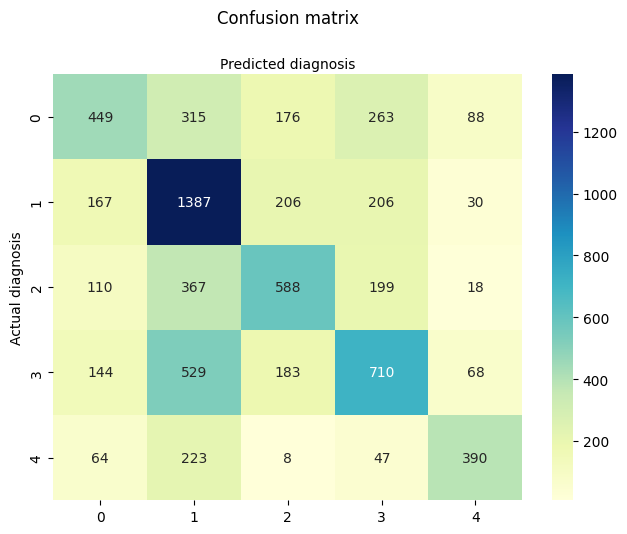

In [ ]:
from sklearn import metrics
import seaborn as sns

test_predictions = best_xgb_model.predict(test_features)
# Create the Confusion Matrix
cnf_matrix = metrics.confusion_matrix(test_labels, test_predictions)

# Visualizing the Confusion Matrix
class_names = np.unique(test_labels) # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

### Bước 7 - Submission

- Ghi kết quả ra tập tin theo chế độ Append: https://drive.google.com/file/d/1qjGycdcIqsoag_yaVqY8UAUNmpFUkVFe/view?usp=sharing
- Quy ước:
  - Date: ví dụ 2024-06-11 10:32:19 (dùng hàm formatted_date = now.strftime("%Y-%m-%d %H:%M:%S"))
  - GroupID: các MSSV của thành viên trong nhóm cách nhau bằng dấu gạch ngang -, ví dụ 21522446-21522243
  - SplitID: giá trị từ 1 đến 5
  - Accuracy: giá trị theo quy ước dấu . phân cách phần thập phân, ví dụ 90.2345 - lấy đến 4 số thập phân
  - Desc: mô tả phương pháp, ví dụ Random. Mỗi nhóm có thể có rất nhiều trials, do đó cần phải mô tả tóm tắt về các trial để còn nhận diện
  
